## Feature extraction

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import afdetection.utils.paths as path
from afdetection.data.make_dataset import MakeDataset
from afdetection.data.signal_preprocessing import SignalPreprocessing
from afdetection.features.build_features import BuildFeatures

sns.set_theme()

## Preprocessing

In [3]:
# Leads names
leads = [
    'I',
    'II', 
    'III', 
    'aVF', 
    'aVR', 
    'aVL', 
    'V1', 
    'V2', 
    'V3', 
    'V4', 
    'V5', 
    'V6', 
]

fs = 500 # Sampling frequency

# Intantiate objects
make_data = MakeDataset()
preprocessing = SignalPreprocessing()

# Load ECGs
ecg_data_DIR = path.data_raw_dir('ecgeq-500hzsrfava.npy')
ecg = make_data.read_from_np(ecg_data_DIR)

# # Mean removal
# ecg = preprocessing.mean_removal(ecg)

# Wander removal
ecg = preprocessing.wander_removal(ecg, fs)

# Pan–Tompkins algorithm
w = int((150/1000)*fs)  # Moving average window size (150ms)
ecg = preprocessing.pan_tompkins(ecg, fs, w)

# Remove first and last second of the ECGs
ecg = ecg[:, 1*fs:-1*fs, :]
m, n, lead = ecg.shape
dur = n/fs
t = np.arange(0, dur, 1/fs)

# Mean removal
ecg = preprocessing.mean_removal(ecg)

# Normalize
# ecg = preprocessing.normalize(ecg)

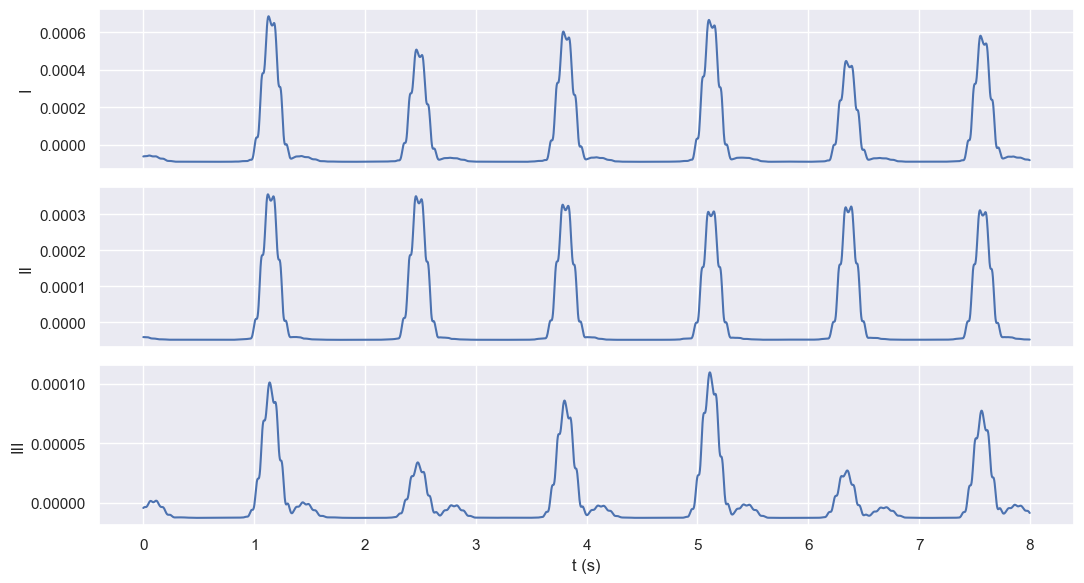

In [4]:
idx = np.random.randint(0, m)
fig, ax = plt.subplots(3, 1, figsize=(11, 6), sharex=True, sharey=False)
for i in range(3):
    ax[i].plot(t, ecg[idx, :, i].ravel())
    ax[i].set_ylabel(leads[i])
ax[i].set_xlabel('t (s)')
plt.tight_layout()
plt.show()

## Build features

In [5]:
build_features = BuildFeatures()

### Spectral Entropy

In [6]:
spectral_entropy = build_features.spectral_entropy_ecg(ecg, fs)

In [7]:
ecg_specEn = pd.DataFrame(spectral_entropy, columns=leads)
ecg_specEn = ecg_specEn.add_suffix('_specEn')
display(ecg_specEn)

,I_specEn,II_specEn,III_specEn,aVF_specEn,aVR_specEn,aVL_specEn,V1_specEn,V2_specEn,V3_specEn,V4_specEn,V5_specEn,V6_specEn
0,1.676562,1.749363,2.268625,1.619254,1.800733,3.689650,2.767865,1.648685,1.697787,1.722314,1.673624,1.665973
1,1.676562,1.749363,2.268625,1.619254,1.800733,3.689650,2.767865,1.648685,1.697787,1.722314,1.673624,1.665973
2,2.506706,3.009748,4.409531,2.716170,2.436821,3.529405,2.677661,2.485850,2.547367,2.560969,2.608803,2.620466
3,1.148147,1.770946,2.465908,1.310650,1.089540,3.134664,0.855291,0.934886,1.486309,1.628305,1.023943,0.960868
4,3.612966,3.438919,3.890226,3.533026,3.717453,3.454853,3.560670,3.558945,3.536269,3.542047,3.571731,3.563359
...,...,...,...,...,...,...,...,...,...,...,...,...
6423,4.274991,4.221741,4.123835,4.312194,4.180064,4.145448,4.166901,4.100227,4.067787,4.075380,4.086429,4.111189
6424,3.773754,3.962813,3.920919,3.804665,3.799965,4.011297,3.935180,4.519224,4.243808,4.351523,3.767230,3.888101
6425,3.286940,3.899100,3.107284,3.880709,3.043798,3.279540,2.877888,2.852879,3.145880,2.951448,3.086531,3.104690
6426,4.338848,4.284936,4.225550,4.180253,4.124905,4.287628,4.201825,4.117103,4.095786,4.115953,4.148973,4.224494


In [8]:
data_DIR = path.data_raw_dir('ecg_features_spectral_entropy.csv')
ecg_specEn.to_csv(data_DIR, index=False)

### Dominant frequency

In [9]:
dominant_frequency = build_features.dominant_frequency_ecg(ecg, fs)

In [10]:
ecg_dFreq = pd.DataFrame(dominant_frequency, columns=leads)
ecg_dFreq = ecg_dFreq.add_suffix('_dFreq')
display(ecg_dFreq)

,I_dFreq,II_dFreq,III_dFreq,aVF_dFreq,aVR_dFreq,aVL_dFreq,V1_dFreq,V2_dFreq,V3_dFreq,V4_dFreq,V5_dFreq,V6_dFreq
0,2.375,2.375,2.375,2.375,2.375,2.375,2.375,2.375,2.375,2.375,2.375,2.375
1,2.375,2.375,2.375,2.375,2.375,2.375,2.375,2.375,2.375,2.375,2.375,2.375
2,1.500,1.500,1.500,1.500,1.500,1.500,1.500,1.500,1.500,1.500,1.500,1.500
3,2.125,2.125,2.125,2.125,2.125,4.250,2.125,2.125,2.125,2.125,2.125,2.125
4,0.750,0.750,0.750,0.750,0.750,0.750,0.750,0.750,0.750,0.750,0.750,0.750
...,...,...,...,...,...,...,...,...,...,...,...,...
6423,1.000,1.000,1.125,1.000,1.000,1.000,1.125,1.125,1.125,1.125,1.125,1.125
6424,1.750,1.750,1.750,1.750,1.750,1.750,1.750,0.875,1.750,1.750,1.750,1.750
6425,2.625,1.375,1.375,1.375,1.375,1.375,1.375,1.375,1.375,1.375,1.375,1.375
6426,1.625,0.625,1.000,1.000,1.625,0.625,1.000,1.625,1.625,1.625,1.625,1.625


In [11]:
data_DIR = path.data_raw_dir('ecg_features_dominant_frequency.csv')
ecg_dFreq.to_csv(data_DIR, index=False)